# Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [21]:
tf.__version__

'2.9.2'

In [22]:
import matplotlib.pyplot as plt

# Reading CSV Files and EDA

In [23]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [26]:
# validating for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

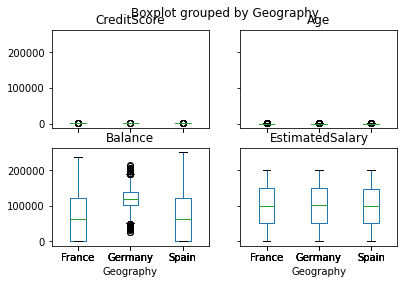

In [27]:
df.boxplot(by='Geography',column = ['CreditScore','Age','Balance','EstimatedSalary'],grid=False);

## Train and Test Split

In [28]:
X = df.iloc[:,3:-1].values
y = df.iloc[:,-1].values

In [29]:
df.shape

(10000, 14)

In [30]:
X.shape

(10000, 10)

In [31]:
y.shape

(10000,)

In [32]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [33]:
print(y)

[1 0 1 ... 1 1 0]


# Encoding Categorical Variable

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

In [35]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


# One Hot Encoding `Geography` column

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [37]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


## Splitting the Dataset

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [40]:
X_train.shape, y_train.shape

((7500, 12), (7500,))

In [41]:
X_test.shape,y_test.shape

((2500, 12), (2500,))

## Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
print(X_train)

[[-1.01558815  1.76021608 -0.57468161 ... -1.55362351 -1.03446007
  -1.64080994]
 [ 0.98465111 -0.56811207 -0.57468161 ...  0.64365658 -1.03446007
  -0.07927152]
 [-1.01558815 -0.56811207  1.74009395 ...  0.64365658  0.96668786
  -0.99684012]
 ...
 [ 0.98465111 -0.56811207 -0.57468161 ...  0.64365658 -1.03446007
   1.4133552 ]
 [-1.01558815 -0.56811207  1.74009395 ...  0.64365658  0.96668786
   0.84496184]
 [-1.01558815  1.76021608 -0.57468161 ...  0.64365658 -1.03446007
   0.32500428]]


In [44]:
print(X_test)

[[-1.01558815  1.76021608 -0.57468161 ...  0.64365658  0.96668786
   1.61203027]
 [ 0.98465111 -0.56811207 -0.57468161 ...  0.64365658 -1.03446007
   0.49626891]
 [-1.01558815 -0.56811207  1.74009395 ...  0.64365658  0.96668786
  -0.42502785]
 ...
 [ 0.98465111 -0.56811207 -0.57468161 ...  0.64365658 -1.03446007
  -0.272747  ]
 [-1.01558815  1.76021608 -0.57468161 ...  0.64365658 -1.03446007
  -0.93306558]
 [ 0.98465111 -0.56811207 -0.57468161 ... -1.55362351 -1.03446007
  -0.47380732]]


## Building ANN

### Initializing ANN

In [46]:
ann = tf.keras.models.Sequential()

### Adding input layer and first hidden layer

In [47]:
from tables.tests.common import unittest
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

### Adding second hidden layer

In [48]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

### Adding the output layer

In [52]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Training the ANN

### Compiling the ANN

In [53]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Training the ANN on training dataset

In [54]:
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
235/235 [==============================] - 1s 2ms/step - loss: 0.6018 - accuracy: 0.7020
Epoch 2/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.7963
Epoch 3/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4773 - accuracy: 0.7963
Epoch 4/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4614 - accuracy: 0.7963
Epoch 5/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7973
Epoch 6/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.8071
Epoch 7/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.8147
Epoch 8/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.8216
Epoch 9/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8252
Epoch 10/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4107 - accura

## Making the predictions and evaluating the model

#### `Predicting result for one observation: `

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

In [57]:
ann.predict([[1,0,0,600,1,40,3,60000,2,1,1,50000]])>0.5

1/1 [==============================] - 0s 48ms/step


array([[ True]])

In [59]:
## Therefore, our model says customer is going to leave the bank

## Predicting the test results

In [75]:
y_pred = ann.predict(X_test)
y_pred = y_pred > 0.5

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 




79/79 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Confusion Matrix

In [78]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred )
print(cm)
print(accuracy_score(y_test,y_pred))

[[1864  127]
 [ 234  275]]
0.8556
